<a href="https://colab.research.google.com/github/VuMaiTuan/20144483-VuMaiTuan/blob/main/Gao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Phan biet cac loai gao

[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/Colab Notebooks/Phan biet cac loai gao'
/content/drive/MyDrive/Colab Notebooks/Phan biet cac loai gao


In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_set=train_datagen.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/Phan biet cac loai gao/TRAIN',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 70 images belonging to 5 classes.


In [ ]:
  validation=train_datagen.flow_from_directory('/content/gdrive/MyDrive/Colab Notebooks/Phan biet cac loai gao/Validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 50 images belonging to 5 classes.


In [ ]:
training_set.class_indices

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

In [ ]:
validation.class_indices

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_25 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_27 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                 

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_set,epochs=500,batch_size=128,verbose=1, validation_data=validation)

Epoch 1/500
3/3 [==============================] - 2s 622ms/step - loss: 0.1277 - accuracy: 0.9571 - val_loss: 6.0452 - val_accuracy: 0.5800
Epoch 2/500
3/3 [==============================] - 1s 313ms/step - loss: 0.0226 - accuracy: 0.9857 - val_loss: 9.5077 - val_accuracy: 0.5600
Epoch 3/500
3/3 [==============================] - 1s 437ms/step - loss: 0.1258 - accuracy: 0.9571 - val_loss: 11.0200 - val_accuracy: 0.6600
Epoch 4/500
3/3 [==============================] - 1s 311ms/step - loss: 0.1548 - accuracy: 0.9429 - val_loss: 12.7865 - val_accuracy: 0.6200
Epoch 5/500
3/3 [==============================] - 1s 436ms/step - loss: 0.1581 - accuracy: 0.9571 - val_loss: 13.1247 - val_accuracy: 0.6400
Epoch 6/500
3/3 [==============================] - 1s 309ms/step - loss: 0.4339 - accuracy: 0.9429 - val_loss: 8.0333 - val_accuracy: 0.6600
Epoch 7/500
3/3 [==============================] - 1s 428ms/step - loss: 0.0716 - accuracy: 0.9714 - val_loss: 6.0054 - val_accuracy: 0.6600
Epoch 8/50

In [ ]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.29481402039527893
Train Accuracy 0.9571428298950195


<function matplotlib.pyplot.show(*args, **kw)>

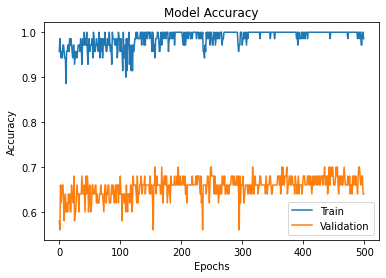

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

1/1 [==============================] - 1s 1s/step
Arborio


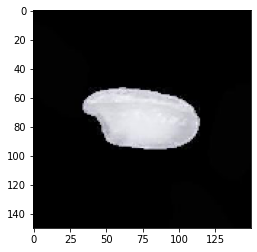

1/1 [==============================] - 0s 18ms/step
Arborio


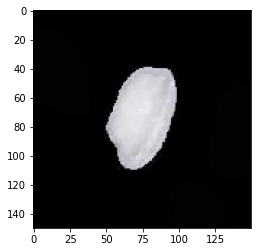

1/1 [==============================] - 0s 19ms/step
Ipsala


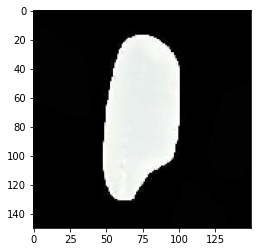

1/1 [==============================] - 0s 16ms/step
Ipsala


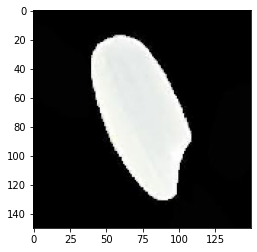

1/1 [==============================] - 0s 19ms/step
Basmati


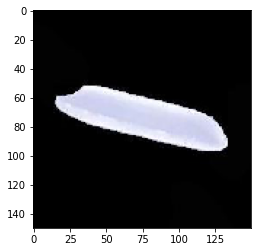

1/1 [==============================] - 0s 15ms/step
Basmati


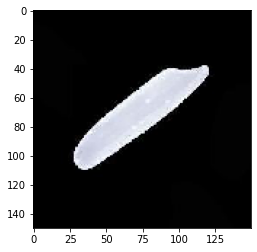

1/1 [==============================] - 0s 16ms/step
Arborio


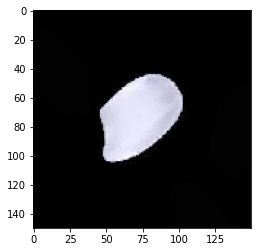

1/1 [==============================] - 0s 15ms/step
Arborio


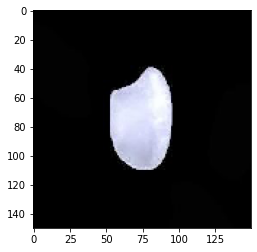

1/1 [==============================] - 0s 16ms/step
Arborio


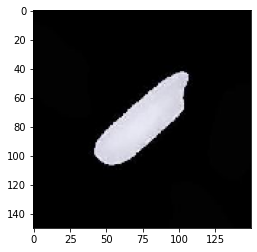

1/1 [==============================] - 0s 18ms/step
Arborio


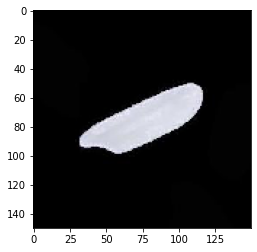

In [ ]:
test="/content/gdrive/MyDrive/Colab Notebooks/Phan biet cac loai gao/test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model.predict(img)
  if round(result[0][0])==1:
    prediction='Arborio'
  if round(result[0][1])==1:
    prediction='Basmati'
  if round(result[0][2])==1:
    prediction='Ipsala'
  if round(result[0][3])==1:
    prediction='Jasmine'
  if round(result[0][4])==1:
    prediction='Karacadag'  
  print(prediction)
  plt.show()